In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datasets
import json

In [2]:
path = "/data/katie_kang/mlmm-evaluation/datasets/m_arc/"
language = "es"
file = path + f"{language}_test.json"
dataset = datasets.load_dataset("json", data_files=file)["train"]
test_choices = (np.array([dataset['option_a'], dataset['option_b'], dataset['option_c'], dataset['option_d']]).transpose())
test_questions = (dataset["instruction"])
test_answers = (dataset['answer'])
test_subjects = ([language for _ in range(len(dataset["instruction"]))])

In [3]:
with open(file) as f:
    data = json.load(f)

In [4]:
np.array([dataset['option_a'], dataset['option_b'], dataset['option_c'], dataset['option_d']]).shape

(4, 1170)

In [5]:
np.array([dataset['option_a'], dataset['option_b'], dataset['option_c'], dataset['option_d']]).transpose()[6]

array(['los edificios se construirán más rápido',
       'los edificios serán más seguros',
       'los diseños de los edificios se verán más bonitos',
       'los materiales de construcción serán más baratos'], dtype=object)

In [17]:
test_questions[6]

'Un grupo de ingenieros quería saber cómo responderían diferentes diseños de edificios durante un terremoto. Crearon varios modelos de edificios y probaron cada uno de ellos para evaluar su capacidad para resistir las condiciones sísmicas. ¿Qué es lo más probable que resulte de probar diferentes diseños de edificios?'

In [18]:
test_choices[6]

array(['tener una gran cantidad de semillas', '6', 'metro',
       'mucho más caliente'], dtype=object)

In [28]:
language_types = ["en"]
language_types += ["de", "fr", "it", "vi", "ar", "ro", "sk", "ca", "hr", "bn", "ne", "mr", "kn"]
language_types += ["ru", "zh", "es", "nl", "id", "hu", "da", "uk", "sr", "hi", "ta", "ml", "te"]

def map_letters_to_numbers(letter):
    if letter == "2":
        return 2
    return ord(letter) - ord("A")

accuracies_base = []
for language in language_types:
    answers = np.load(os.path.join("base_model_arc_0shot", f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join("base_model_arc_0shot", f"{language}_A_to_D_probs.npy"))
    accuracies_base.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))

accuracies_multilingual = []
model_path = "/data/katie_kang/trlx/examples/ckpts/sft_arc_multilingual_llama7B/checkpoint_20000/hf_model"

for language in language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs.npy"))
    accuracies_multilingual.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))


accuracies_english = []
model_path = "/data/katie_kang/trlx/examples/ckpts/sft_arc_english_llama7B_2/checkpoint_20000/hf_model"

for language in language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs.npy"))
    accuracies_english.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))

In [36]:
language_types = ["en"]
language_types += ["de", "fr", "it", "vi", "ar", "ro", "sk", "ca", "hr", "bn", "ne", "mr", "kn"]
language_types += ["ru", "zh", "es", "nl", "id", "hu", "da", "uk", "sr", "hi", "ta", "ml", "te"]

def map_letters_to_numbers(letter):
    if letter == "2":
        return 1
    if letter == "1":
        return 0
    if letter == "3":
        return 2
    if letter == "4":
        return 3
    return ord(letter) - ord("A")

# likelihoods_base = []
# for language in language_types:
#     answers = np.load(os.path.join("base_model_arc_0shot", f"{language}_answers.npy"))
#     A_to_D_logits_all = np.load(os.path.join("base_model_arc_0shot", f"{language}_A_to_D_probs.npy"))
#     likelihoods_base.append(A_to_D_logits_all.sum(-1).mean())

likelihoods_multilingual = []
likelihoods_gt_multilingual = []
model_path = "/data/katie_kang/trlx/examples/ckpts/sft_arc_multilingual_llama7B/checkpoint_20000/hf_model"

for language in language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    likelihoods_multilingual.append(A_to_D_logits_all.sum(-1).mean())
    likelihoods_gt_multilingual.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))].mean())


likelihoods_english = []
likelihoods_gt_english = []
model_path = "/data/katie_kang/trlx/examples/ckpts/sft_arc_english_llama7B_2/checkpoint_20000/hf_model"

for language in language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    likelihoods_english.append((A_to_D_logits_all.sum(-1)).mean())
    likelihoods_gt_english.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))].mean())


In [41]:
likelihoods_english

[0.9895533684545579,
 0.9597905971219147,
 0.9641139411848036,
 0.9372154993746886,
 0.9878695648420561,
 0.9768195537136456,
 0.978799707122863,
 0.9341346745647315,
 0.9690631788831375,
 0.9413323342239571,
 0.9697858787814686,
 0.9883289056650949,
 0.9560394019066348,
 0.850190386320898,
 0.9953458438542635,
 0.9603225289835249,
 0.9733532500996165,
 0.9706978346017407,
 0.8389910157006746,
 0.9692882031470385,
 0.9666741103639882,
 0.9901102704550299,
 0.943346697587449,
 0.9888771315063829,
 0.9595282339424193,
 0.9437054620913676,
 0.8312268283896846]

In [39]:
likelihoods_gt_english

[0.48489960630348405,
 0.3503600466167959,
 0.3770408453146894,
 0.3741537930086516,
 0.3265450166346489,
 0.22799484206616522,
 0.35289687110712303,
 0.2928132358250024,
 0.3474031022268294,
 0.32465571929673004,
 0.23528468661425908,
 0.2441084671451924,
 0.24089004002243009,
 0.20804398601809268,
 0.35458765966114086,
 0.33674609217878876,
 0.389101984948308,
 0.3389128933538902,
 0.30065436628749886,
 0.31068755774026047,
 0.3434307401680811,
 0.33172268022771334,
 0.33355983285896323,
 0.2437347234483753,
 0.2403462207064612,
 0.23526764764113958,
 0.20759505524571006]

In [37]:
answers[np.where(np.array(list(map(map_letters_to_numbers, answers))) == -13)[0]]

array([], dtype='<U1')

In [27]:
answers

array(['C', 'B', 'C', ..., 'A', 'D', 'A'], dtype='<U1')

In [25]:
((np.array(list(map(map_letters_to_numbers, answers))))==-15).sum()

9

In [23]:
A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))].shape

(1140,)

In [9]:
likelihoods_english

[0.9895533684545579,
 0.9597905971219147,
 0.9641139411848036,
 0.9372154993746886,
 0.9878695648420561,
 0.9768195537136456,
 0.978799707122863,
 0.9341346745647315,
 0.9690631788831375,
 0.9413323342239571,
 0.9697858787814686,
 0.9883289056650949,
 0.9560394019066348,
 0.850190386320898,
 0.9953458438542635,
 0.9603225289835249,
 0.9733532500996165,
 0.9706978346017407,
 0.8389910157006746,
 0.9692882031470385,
 0.9666741103639882,
 0.9901102704550299,
 0.943346697587449,
 0.9888771315063829,
 0.9595282339424193,
 0.9437054620913676,
 0.8312268283896846]

In [30]:
accuracies_multilingual = np.array(accuracies_multilingual)
accuracies_english = np.array(accuracies_english)

In [31]:
language_types = ["en"]
language_types += ["de", "fr", "it", "vi", "ar", "ro", "sk", "ca", "hr", "bn", "ne", "mr", "kn"]
len(language_types)

14

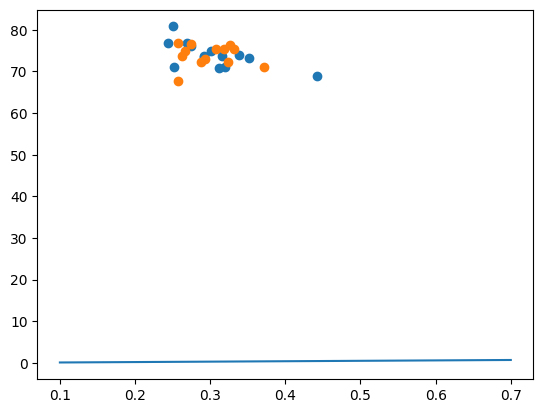

In [37]:
# plt.scatter(accuracies_base[:14], accuracies_multilingual[:14])
# plt.scatter(accuracies_base[14:], accuracies_multilingual[14:])

plt.scatter(accuracies_base[:14], likelihoods_multilingual[:14])
plt.scatter(accuracies_base[14:], likelihoods_multilingual[14:])


# plt.scatter(accuracies_base, accuracies_english)


plt.plot([0.1, 0.7], [0.1, 0.7])

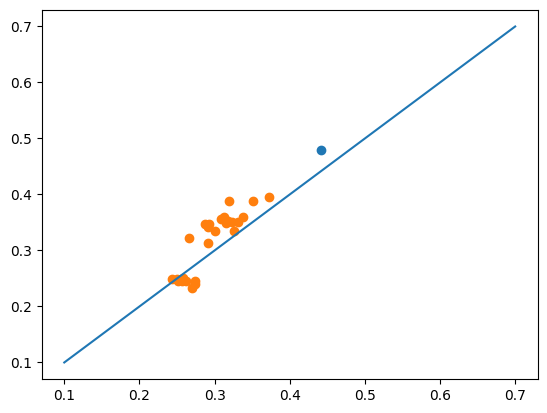

In [28]:
plt.scatter(accuracies_base[:1], accuracies_english[:1])
plt.scatter(accuracies_base[1:], accuracies_english[1:])

# plt.scatter(accuracies_base, accuracies_english)


plt.plot([0.1, 0.7], [0.1, 0.7])

In [9]:
language_types = ["en"]
language_types += ["de", "fr", "it", "vi", "ar", "ro", "sk", "ca", "hr", "bn", "ne", "mr", "kn"]
language_types += ["ru", "zh", "es", "nl", "id", "hu", "da", "uk", "sr", "hi", "ta", "ml", "te"]
accuracies = []
def map_letters_to_numbers(letter):
    return ord(letter) - ord("A")
    
for language in language_types:
    answers = np.load(os.path.join("base_model_arc", f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join("base_model_arc", f"{language}_A_to_D_probs.npy"))
    accuracies.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))

In [10]:
accuracies

[0.5278969957081545,
 0.24636441402908468,
 0.24208725406330198,
 0.24807527801539778,
 0.2264957264957265,
 0.26518391787852863,
 0.2236503856041131,
 0.24807527801539778,
 0.2564322469982847,
 0.23609923011120615,
 0.26518391787852863,
 0.26518391787852863,
 0.24588744588744588,
 0.22560975609756098,
 0.2540633019674936,
 0.2512820512820513,
 0.2623931623931624,
 0.23952095808383234,
 0.24786324786324787,
 0.23715753424657535,
 0.22707797772065125,
 0.24379811804961504,
 0.22668947818648416,
 0.2440068493150685,
 0.2635726795096322,
 0.266199649737303,
 0.22631578947368422]

In [4]:
len(np.load(os.path.join("base_model_arc", f"de_A_to_D_probs.npy")))

1169

In [5]:
np.load(os.path.join("base_model_arc", f"fr_A_to_D_probs.npy"))

array([[0.49068847, 0.32884756, 0.12482741, 0.05563652],
       [0.56073493, 0.25853738, 0.11386613, 0.06686162],
       [0.23667745, 0.13979493, 0.28985056, 0.33367705],
       ...,
       [0.37514955, 0.2361467 , 0.23707004, 0.15163369],
       [0.28160289, 0.1159593 , 0.26149485, 0.34094301],
       [0.30451015, 0.19265641, 0.2986483 , 0.20418514]])